In [1]:
import pandas as pd
from pycaret.regression import *
train = pd.read_csv("../../datasets/regression/train.csv")
test = pd.read_csv("../../datasets/regression/test.csv")
dataset = train.append(test, ignore_index = True)

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### Function setup

Provides some useful about the dataset as

- Target Type : binary or Multiclass. 

- Label Encoded : automatically encodes the label into 1 and 0 and displays the mapping.

- Original Data : number of samples and features of the dataset.

- Missing Values : True if there are missing values in the original data.

- Numeric Features : number of features inferred as numeric.

- Categorical Features : number of features inferred as categorical.

- Transformed Train Set : shape of the transformed training set

- Transformed Test Set : shape of the transformed test/hold-o

In [2]:
s = setup(
    dataset,
    target = "SalePrice",
    train_size = 0.5,
    numeric_imputation = "mean",
    categorical_imputation = "constant"
)

,Description,Value
0,session_id,2893
1,Target,SalePrice
2,Original Data,"(2919, 81)"
3,Missing Values,True
4,Numeric Features,22
5,Categorical Features,58
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(750, 355)"


### Function _compare\_models_

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores.

In [3]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17659.6973,812176139.3946,27585.9111,0.8595,0.1464,0.1066,0.2390
lightgbm,Light Gradient Boosting Machine,17997.6693,880904542.9419,28609.9863,0.8521,0.1507,0.1072,0.0700
rf,Random Forest Regressor,18600.9374,867036064.5935,28792.9949,0.8511,0.1566,0.1124,0.4960
et,Extra Trees Regressor,20021.4133,1023566370.7268,31249.3737,0.8237,0.1696,0.1222,0.5540
ada,AdaBoost Regressor,23686.4958,1287904523.6633,34717.5358,0.7810,0.1930,0.1513,0.1560
omp,Orthogonal Matching Pursuit,18400.1950,1291580549.9145,30927.6182,0.7771,0.1798,0.1125,0.0240
ridge,Ridge Regression,20020.7673,1501485907.2000,34601.9158,0.7438,0.1751,0.1211,0.0340
llar,Lasso Least Angle Regression,19618.7240,1526875306.2109,33518.4235,0.7369,0.1853,0.1210,1.1820
lasso,Lasso Regression,20505.2256,1606890838.4000,34759.4342,0.7225,0.2155,0.1278,0.0820
en,Elastic Net,22094.4258,1668283334.4000,36782.3422,0.7217,0.1766,0.1307,0.1090


In [4]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2893, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Function _evaluate\_model/1_

This function analyzes the performance of a trained model on the test set.

In [5]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

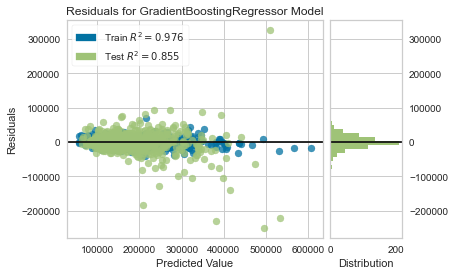

In [6]:
plot_model(best, plot = 'residuals')

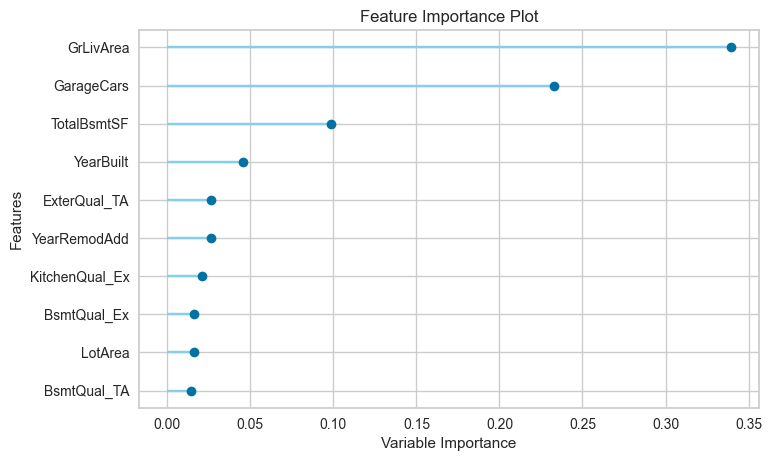

In [7]:
plot_model(best, plot = 'feature')

### _predict\_model_

This function predicts the Label and the Score (probability of predicted class) columns using a trained model.

To see the probability of both the classes, simply pass raw_score = True as parameter

In [8]:
predictions = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,17847.8798,989400400.2750,31454.7357,0.8551,0.1436,0.1024


In [9]:
predictions.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,70.0,8750.0,1996.0,1996.0,0.0,0.0,0.0,880.0,880.0,909.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,191000.0,184627.284711
1,86.0,11500.0,1936.0,1987.0,0.0,223.0,0.0,794.0,1017.0,1020.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000.0,234315.253389
2,60.0,6960.0,1970.0,1970.0,0.0,375.0,239.0,250.0,864.0,864.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,120500.0,114491.795690
3,94.0,10402.0,2009.0,2009.0,0.0,0.0,0.0,1226.0,1226.0,1226.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,198900.0,211263.224490
4,80.0,11844.0,2008.0,2008.0,464.0,0.0,0.0,2046.0,2046.0,2046.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,372500.0,342799.926840
